[-3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]
[74.666664, 70.98, 67.386665, 63.88667, 60.479992, 57.166668, 53.946674, 50.819996, 47.78667, 44.84666, 42.0, 39.246666, 36.586662, 34.020004, 31.546667, 29.166666, 26.88, 24.686666, 22.58667, 20.58, 18.666666, 16.846666, 15.12, 13.486667, 11.946668, 10.5, 9.146666, 7.886667, 6.72, 5.646666, 4.6666665, 3.78, 2.986667, 2.2866664, 1.68, 1.1666666, 0.7466666, 0.42000008, 0.18666662, 0.04666671, 0.0, 0.04666671, 0.18666674, 0.41999987, 0.7466665, 1.1666666, 1.6800003, 2.2866673, 2.986666, 3.7799995, 4.6666665, 5.646666, 6.720001, 7.8866653, 9.146668, 10.5, 11.946666,

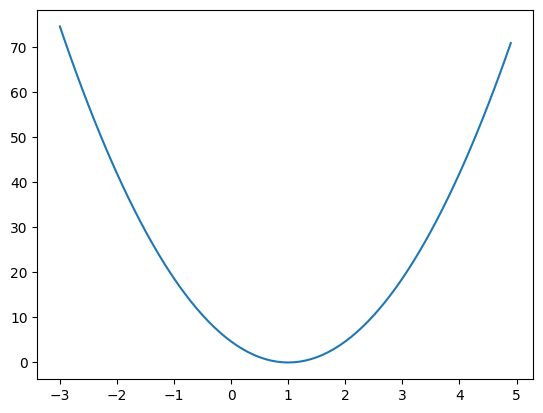

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = tf.constant([1, 2, 3], dtype= tf.float32)
Y = tf.constant([1, 2, 3], dtype= tf.float32)

W = tf.Variable(1., name = "W", dtype = tf.float32)

def hypothesis():
    return tf.multiply(X, W)

def cost():
    return tf.math.reduce_mean(tf.math.square(hypothesis() - Y))

W_val = []
cost_val = []

for i in range(-30, 50):
    W.assign(i * 0.1) # -3 ~ 5까지 X축 이동
    curr_cost = cost()
    W_val.append(W.numpy())
    cost_val.append(curr_cost.numpy())

print(W_val)
print(cost_val)

# 시각화
plt.plot(W_val, cost_val)
plt.show()

In [75]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random.normal([1]), name='weight')
X = tf.Variable(1., shape=tf.TensorShape(None), dtype=tf.float32)
Y = tf.Variable(1., shape=tf.TensorShape(None), dtype=tf.float32)

# 선형 예측 모델 X * W
def hypothesis():
    return X * W

# 비용 함수
def cost():
    return tf.math.reduce_mean(tf.square(hypothesis() - Y))

# 최소화, 경사 하강 W -= learning_rate * derivative
learning_rate = 0.1

def gradient():
    return tf.math.reduce_mean((W * X - Y) * X)

def descent():
    return W - learning_rate * gradient()

def update():
    W.assign(descent())

for step in range(21):
    X.assign(x_data)
    Y.assign(y_data)
    update()
    print(step, cost().numpy(), W.numpy())

0 2.1266353 [0.6102533]
1 0.6049095 [0.7921351]
2 0.17206296 [0.88913876]
3 0.04894245 [0.940874]
4 0.013921384 [0.96846616]
5 0.0039598537 [0.98318195]
6 0.0011263567 [0.9910304]
7 0.0003203859 [0.9952162]
8 9.113424e-05 [0.9974486]
9 2.5922098e-05 [0.9986393]
10 7.372434e-06 [0.9992743]
11 2.0970447e-06 [0.999613]
12 5.964025e-07 [0.9997936]
13 1.6963726e-07 [0.9998899]
14 4.8278043e-08 [0.9999413]
15 1.37202285e-08 [0.9999687]
16 3.8994585e-09 [0.9999833]
17 1.1074128e-09 [0.9999911]
18 3.0873437e-10 [0.9999953]
19 8.9542596e-11 [0.9999975]
20 2.3149482e-11 [0.9999987]


In [90]:
import tensorflow as tf

x_data = tf.constant([1, 2, 3], dtype=tf.float32)
y_data = tf.constant([1, 2, 3], dtype=tf.float32)

W = tf.Variable(-3.0)

# 선형 예측 모델 X * W
def hypothesis():
    return X * W

# 비용 함수
def cost():
    return tf.math.reduce_mean(tf.square(hypothesis() - Y))

# 최소화,
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)

for step in range(21):
    print(step, W.numpy())
    optimizer.minimize(cost, var_list=[W])

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0


In [110]:
# manual gradient vs SGD
import tensorflow as tf

x_data = tf.constant([1, 2, 3], dtype=tf.float32)
y_data = tf.constant([1, 2, 3], dtype=tf.float32)

W = tf.Variable(5.0)

# 선형 예측 모델 X * W
def hypothesis():
    return X * W

def manualGradient():
    return tf.math.reduce_mean((W * X - Y) * X) * 2

# 비용 함수
def cost():
    return tf.math.reduce_mean(tf.square(hypothesis() - Y))

# 옵티마이저
def optimizer():
    return tf.keras.optimizers.SGD(learning_rate = 0.1)

# 텐서플로우 gradients
def getGradients():
    return optimizer().compute_gradients(cost, var_list=[W])

def applyGradients():
    return optimizer().apply_gradients(getGradients())

for step in range(100):
    x = getGradients()
    print(step, manualGradient().numpy(), W.numpy(), x[0][0].numpy(), x[0][1].numpy())
    applyGradients()

0 37.333332 5.0 37.333336 5.0
1 2.4888866 1.2666664 2.4888866 1.2666664
2 0.1659259 1.0177778 0.1659259 1.0177778
3 0.011061668 1.0011852 0.011061668 1.0011852
4 0.00073742867 1.000079 0.00073742867 1.000079
5 4.895528e-05 1.0000052 4.8955284e-05 1.0000052
6 3.0994415e-06 1.0000004 3.0994415e-06 1.0000004
7 0.0 1.0 0.0 1.0
8 0.0 1.0 0.0 1.0
9 0.0 1.0 0.0 1.0
10 0.0 1.0 0.0 1.0
11 0.0 1.0 0.0 1.0
12 0.0 1.0 0.0 1.0
13 0.0 1.0 0.0 1.0
14 0.0 1.0 0.0 1.0
15 0.0 1.0 0.0 1.0
16 0.0 1.0 0.0 1.0
17 0.0 1.0 0.0 1.0
18 0.0 1.0 0.0 1.0
19 0.0 1.0 0.0 1.0
20 0.0 1.0 0.0 1.0
21 0.0 1.0 0.0 1.0
22 0.0 1.0 0.0 1.0
23 0.0 1.0 0.0 1.0
24 0.0 1.0 0.0 1.0
25 0.0 1.0 0.0 1.0
26 0.0 1.0 0.0 1.0
27 0.0 1.0 0.0 1.0
28 0.0 1.0 0.0 1.0
29 0.0 1.0 0.0 1.0
30 0.0 1.0 0.0 1.0
31 0.0 1.0 0.0 1.0
32 0.0 1.0 0.0 1.0
33 0.0 1.0 0.0 1.0
34 0.0 1.0 0.0 1.0
35 0.0 1.0 0.0 1.0
36 0.0 1.0 0.0 1.0
37 0.0 1.0 0.0 1.0
38 0.0 1.0 0.0 1.0
39 0.0 1.0 0.0 1.0
40 0.0 1.0 0.0 1.0
41 0.0 1.0 0.0 1.0
42 0.0 1.0 0.0 1.0
43 0.0 1.0 0